In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from pre_process import pre_processing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical

In [14]:
sequence_length = 30
X_30, y_30 = pre_processing('Modified_Result_5m_1.csv','with_Indicator_5m_BTC_USDT.csv', sequence_length)

In [15]:
sequence_length = 15
X_15, y_15 = pre_processing('Modified_Result_5m_1.csv','with_Indicator_5m_BTC_USDT.csv', sequence_length)

In [16]:
sequence_length = 5
X_5, y_5 = pre_processing('Modified_Result_5m_1.csv','with_Indicator_5m_BTC_USDT.csv', sequence_length)

In [50]:
X = X_15
y = y_15

In [51]:
X.shape

(2226, 150)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
unique_classes, counts = np.unique(y_train, return_counts=True)
print(unique_classes)
print(counts)
unique_classes, counts = np.unique(y_test, return_counts=True)
print(unique_classes)
print(counts)

[0 1 2]
[591 600 589]
[0 1 2]
[151 142 153]


In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1780, 150)
(446, 150)
(1780,)
(446,)


In [67]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Model output layer for 3 classes
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    BatchNormalization(),  # Normalize after first Dense
    Dropout(0.1),  # Dropout for regularization
    
    Dense(256, activation='relu'),
    BatchNormalization(),  # Normalize after second Dense
    Dropout(0.1),

    Dense(128, activation='relu'),
    
    Dense(64, activation='relu'),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile with sparse categorical crossentropy
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32)


Epoch 1/25
56/56 [==============================] - 3s 8ms/step - loss: 1.2364 - accuracy: 0.3354
Epoch 2/25
56/56 [==============================] - 0s 7ms/step - loss: 1.1446 - accuracy: 0.3680
Epoch 3/25
56/56 [==============================] - 1s 12ms/step - loss: 1.1391 - accuracy: 0.3567
Epoch 4/25
56/56 [==============================] - 1s 9ms/step - loss: 1.1269 - accuracy: 0.3551
Epoch 5/25
56/56 [==============================] - 1s 9ms/step - loss: 1.1235 - accuracy: 0.3562
Epoch 6/25
56/56 [==============================] - 1s 10ms/step - loss: 1.1251 - accuracy: 0.3635
Epoch 7/25
56/56 [==============================] - 0s 9ms/step - loss: 1.1166 - accuracy: 0.3579
Epoch 8/25
56/56 [==============================] - 1s 9ms/step - loss: 1.1230 - accuracy: 0.3438
Epoch 9/25
56/56 [==============================] - 1s 9ms/step - loss: 1.1119 - accuracy: 0.3736
Epoch 10/25
56/56 [==============================] - 0s 8ms/step - loss: 1.1188 - accuracy: 0.3618
Epoch 11/25
56/56

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming `y_test` are the true labels and `y_pred` are the predicted labels from the model
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class predictions
print(accuracy_score(y_test, y_pred_classes))

14/14 [==============================] - 0s 3ms/step
0.3744394618834081


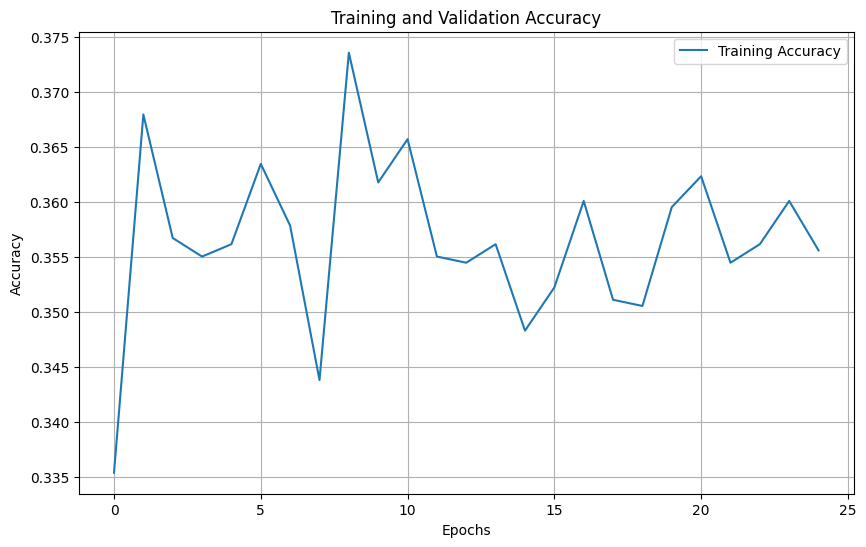

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

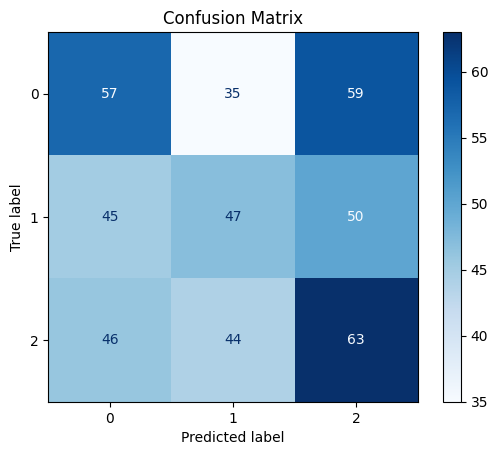

In [70]:

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(3))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

